In [1]:
import json
import itertools
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.stats.mstats import spearmanr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from importlib import reload

import warnings
warnings.filterwarnings('ignore')

In [2]:
tng_full = pd.read_csv('./datasets_with_labels/tng.csv', header=None)
df_data_full = tng_full.iloc[:, :-1]
df_labels_full = tng_full.iloc[:, -1]

In [3]:
tng_tsne_embedding = pd.read_csv(
    './visualizations/data_embedded/tng_tsne_embedding.csv', 
    header=None)
tng_umap_embedding = pd.read_csv(
    './visualizations/data_embedded/tng_umap_embedding.csv', 
    header=None)
tng_isomap_embedding = pd.read_csv(
    './visualizations/data_embedded/tng_isomap_embedding.csv', 
    header=None)
tng_ivhd_euclidean_embedding = pd.read_csv(
    './ivhd_visualization_files/tng_euclidean_visualization.txt', 
    header=None, 
    usecols=[0, 1])
tng_ivhd_cosine_embedding = pd.read_csv(
    './ivhd_visualization_files/tng_cosine_visualization.txt', 
    header=None,
    usecols=[0, 1])

In [4]:
def plot_2d_20ng_scatter(X, y, target_names, title, ax):
    for i in y.unique():
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        ax.scatter(dim0, dim1, label=f"{target_names[i]}")
    ax.set_xticks(())
    ax.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.title(title)

In [5]:
from sklearn.datasets import fetch_20newsgroups
NG20_original = fetch_20newsgroups(subset='all')
target_names=NG20_original.target_names

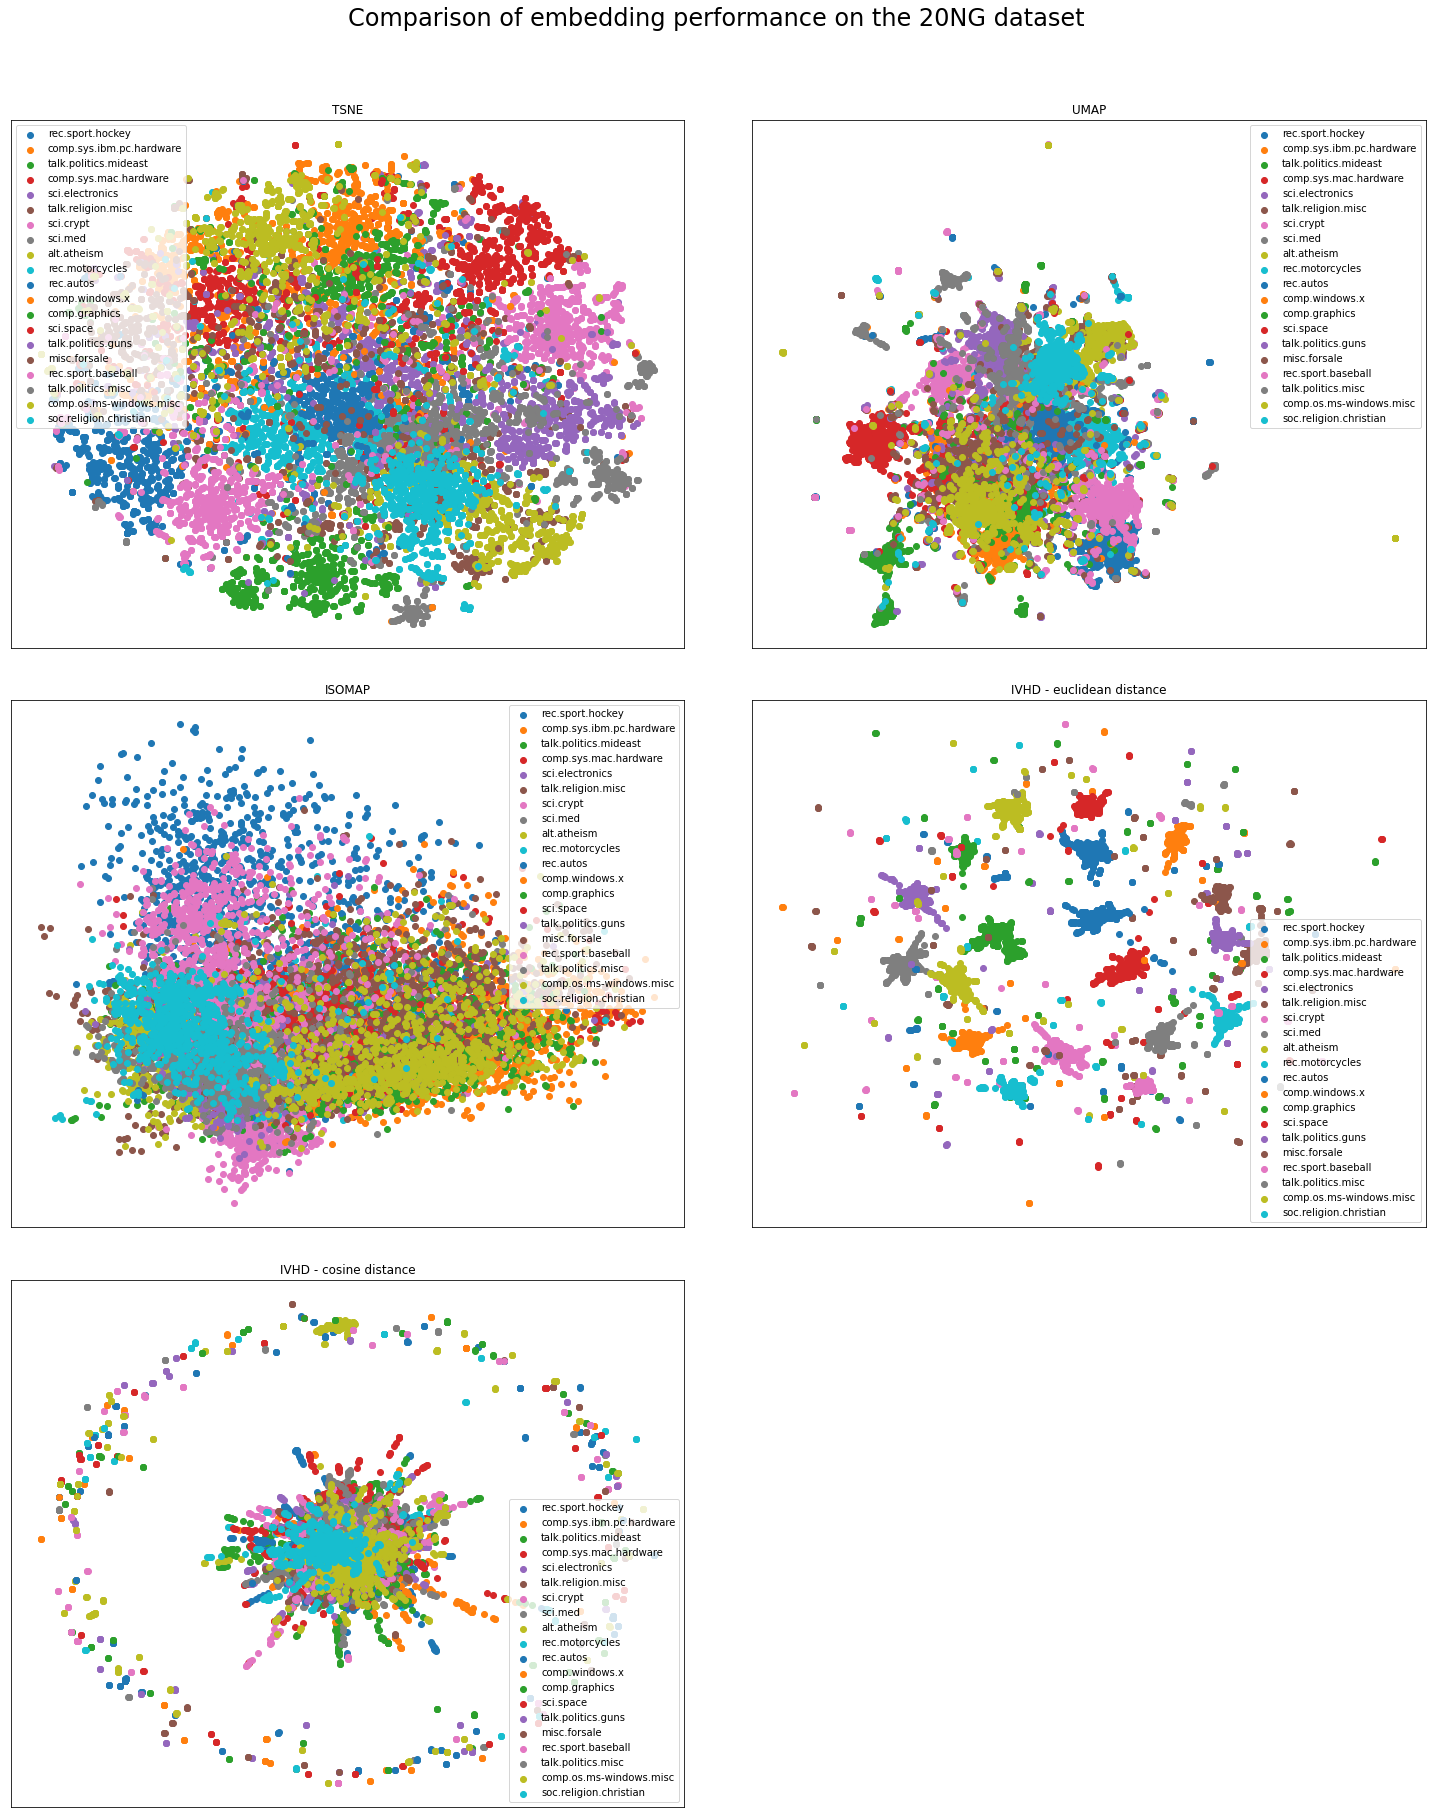

In [6]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
plot_2d_20ng_scatter(tng_tsne_embedding.values, df_labels_full, target_names, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
plot_2d_20ng_scatter(tng_umap_embedding.values, df_labels_full, target_names, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
plot_2d_20ng_scatter(tng_isomap_embedding.values, df_labels_full, target_names, 'ISOMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
plot_2d_20ng_scatter(tng_ivhd_euclidean_embedding.values, df_labels_full, target_names, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
plot_2d_20ng_scatter(tng_ivhd_cosine_embedding.values, df_labels_full, target_names, 'IVHD - cosine distance', ax20)

fig.suptitle('Comparison of embedding performance on the 20NG dataset\n', size=24, y=1.05)
fig.subplots_adjust(wspace=0.1, hspace=0.1) 
plt.show()

In [7]:
fig.savefig("20NG-VISUALIZATIONS.png", transparent=True, facecolor='w')

In [29]:
random_embedding = np.random.rand(len(tng_full), 2)
df_random_embedding = pd.DataFrame(data=random_embedding)

## Based on co-rank matrix

In [30]:
import metrics.co_rank_matrix_based_metric 
reload(metrics.co_rank_matrix_based_metric)

from metrics.co_rank_matrix_based_metric import CoRankMatrixBasedMetric

In [53]:
random_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    df_random_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000],
)

tsne_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    tng_tsne_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000],
)

umap_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    tng_umap_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

isomap_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    tng_isomap_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

ivhd_euclidean_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    tng_ivhd_euclidean_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

ivhd_cosine_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    tng_ivhd_cosine_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

In [64]:
random_embedding_cr_metric_value = json.loads(random_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 70.87 seconds.


In [54]:
tsne_embedding_cr_metric_value = json.loads(tsne_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 73.67 seconds.


In [56]:
umap_embedding_cr_metric_value = json.loads(umap_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 71.58 seconds.


In [57]:
isomap_embedding_cr_metric_value = json.loads(isomap_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 74.66 seconds.


In [58]:
ivhd_euclidean_embedding_cr_metric_value = json.loads(ivhd_euclidean_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 73.25 seconds.


In [59]:
ivhd_cosine_embedding_cr_metric_value = json.loads(ivhd_cosine_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 73.42 seconds.


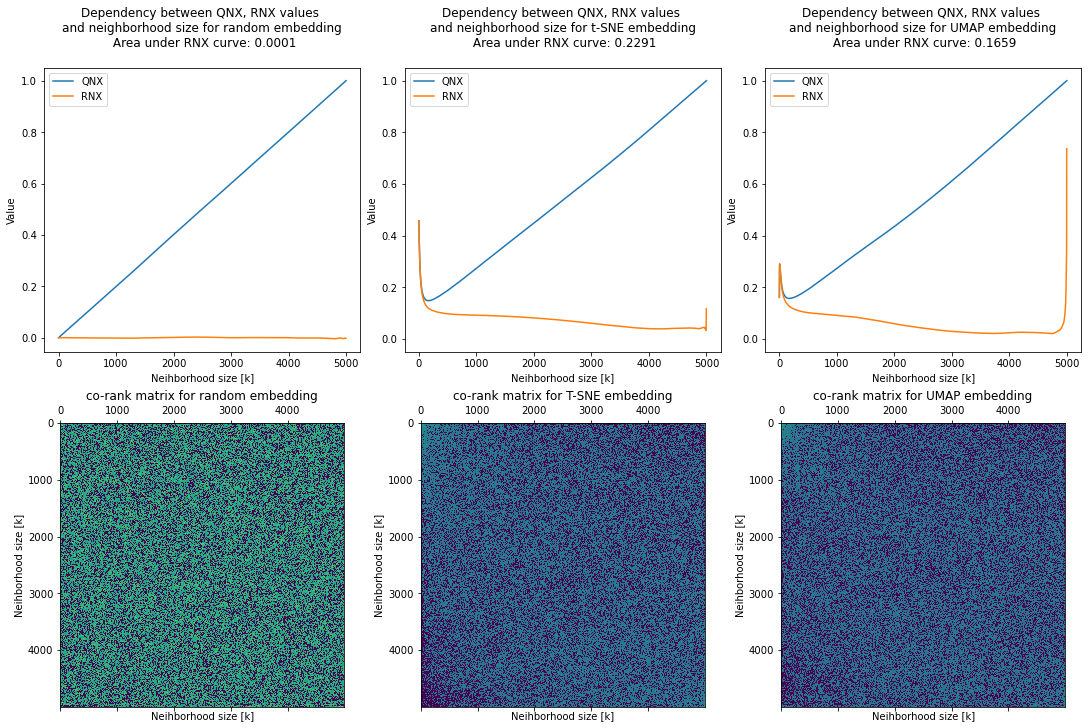

In [65]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

#=======================================================================================================

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for random embedding'
               f'\n Area under RNX curve: {random_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(random_embedding_cr_metric_value['QNX'], label='QNX')
ax00.plot(random_embedding_cr_metric_value['RNX'], label='RNX')
ax00.legend()


ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for t-SNE embedding'
               f'\n Area under RNX curve: {tsne_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(tsne_embedding_cr_metric_value['QNX'], label='QNX')
ax01.plot(tsne_embedding_cr_metric_value['RNX'], label='RNX')
ax01.legend()

ax02 = fig.add_subplot(spec[0, 2])
ax02.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for UMAP embedding'
               f'\n Area under RNX curve: {umap_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax02.set_xlabel('Neihborhood size [k]')
ax02.set_ylabel('Value')
ax02.plot(umap_embedding_cr_metric_value['QNX'], label='QNX')
ax02.plot(umap_embedding_cr_metric_value['RNX'], label='RNX')
ax02.legend()

#=======================================================================================================

ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for random embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(random_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for T-SNE embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(tsne_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax12 = fig.add_subplot(spec[1, 2])
ax12.set_title("co-rank matrix for UMAP embedding")
ax12.set_xlabel('Neihborhood size [k]')
ax12.set_ylabel('Neihborhood size [k]')
ax12.matshow(np.log(umap_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

In [66]:
fig.savefig("metrics_plots/20NG-co-rank-matrix-part-1.png", transparent=True, facecolor='w')

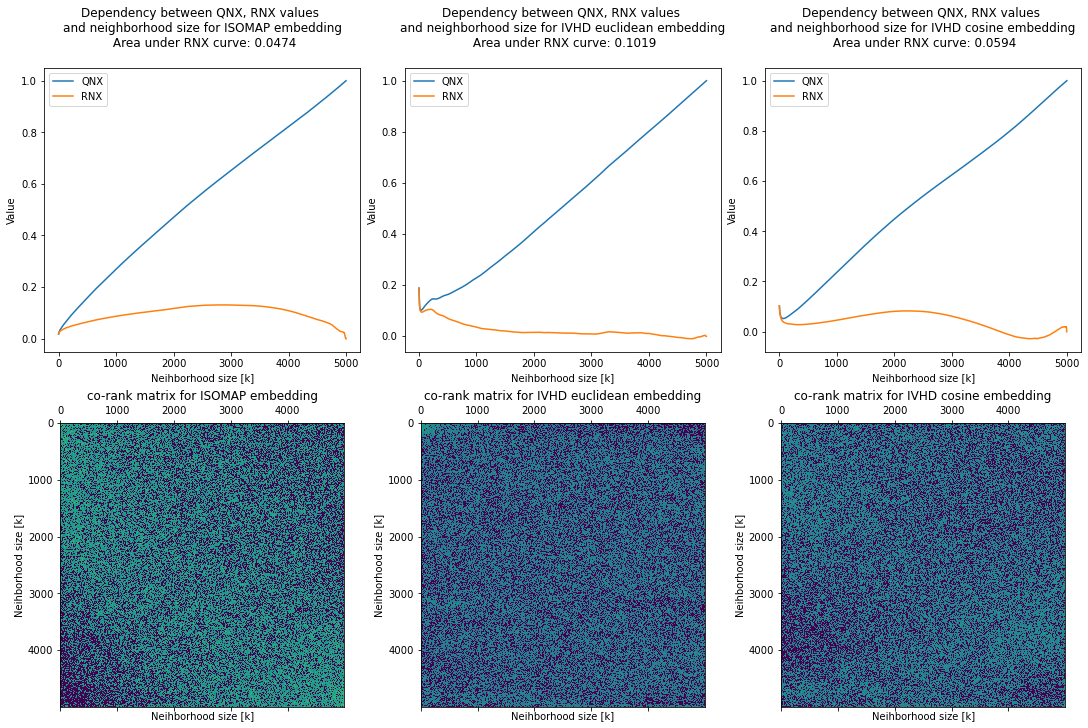

In [67]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

#=======================================================================================================

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for ISOMAP embedding'
               f'\n Area under RNX curve: {isomap_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(isomap_embedding_cr_metric_value['QNX'], label='QNX')
ax00.plot(isomap_embedding_cr_metric_value['RNX'], label='RNX')
ax00.legend()


ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for IVHD euclidean embedding'
               f'\n Area under RNX curve: {ivhd_euclidean_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(ivhd_euclidean_embedding_cr_metric_value['QNX'], label='QNX')
ax01.plot(ivhd_euclidean_embedding_cr_metric_value['RNX'], label='RNX')
ax01.legend()

ax02 = fig.add_subplot(spec[0, 2])
ax02.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for IVHD cosine embedding'
               f'\n Area under RNX curve: {ivhd_cosine_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax02.set_xlabel('Neihborhood size [k]')
ax02.set_ylabel('Value')
ax02.plot(ivhd_cosine_embedding_cr_metric_value['QNX'], label='QNX')
ax02.plot(ivhd_cosine_embedding_cr_metric_value['RNX'], label='RNX')
ax02.legend()

#=======================================================================================================

ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for ISOMAP embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(isomap_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for IVHD euclidean embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(ivhd_euclidean_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax12 = fig.add_subplot(spec[1, 2])
ax12.set_title("co-rank matrix for IVHD cosine embedding")
ax12.set_xlabel('Neihborhood size [k]')
ax12.set_ylabel('Neihborhood size [k]')
ax12.matshow(np.log(ivhd_cosine_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

In [68]:
fig.savefig("metrics_plots/20NG-co-rank-matrix-part-2.png", transparent=True, facecolor='w')

## Shepard's diagrams

In [8]:
from metrics.sheppards_diagram import ShepardDiagram

In [9]:
tsne_diagram = ShepardDiagram(df_data_full, tng_tsne_embedding, df_labels_full)
umap_diagram = ShepardDiagram(df_data_full, tng_umap_embedding, df_labels_full)
isomap_diagram = ShepardDiagram(df_data_full, tng_isomap_embedding, df_labels_full)
ivhd_euclidean_diagram = ShepardDiagram(df_data_full, tng_ivhd_euclidean_embedding, df_labels_full)
ivhd_cosine_diagram = ShepardDiagram(df_data_full, tng_ivhd_cosine_embedding, df_labels_full)

In [10]:
tsne_diagram.calculate()
umap_diagram.calculate()
isomap_diagram.calculate()
ivhd_euclidean_diagram.calculate()
ivhd_cosine_diagram.calculate()

ShepardDiagram calculation took 0.09 seconds.
ShepardDiagram calculation took 0.07 seconds.
ShepardDiagram calculation took 0.07 seconds.
ShepardDiagram calculation took 0.09 seconds.
ShepardDiagram calculation took 0.07 seconds.


In [11]:
def draw_diagram(x, y, title, ax):
    ax.scatter(x, y, alpha=0.2)
    ax.set_xlabel('Input distance')
    ax.set_ylabel('Output distance')
    plt.title(title)
    ax.grid()

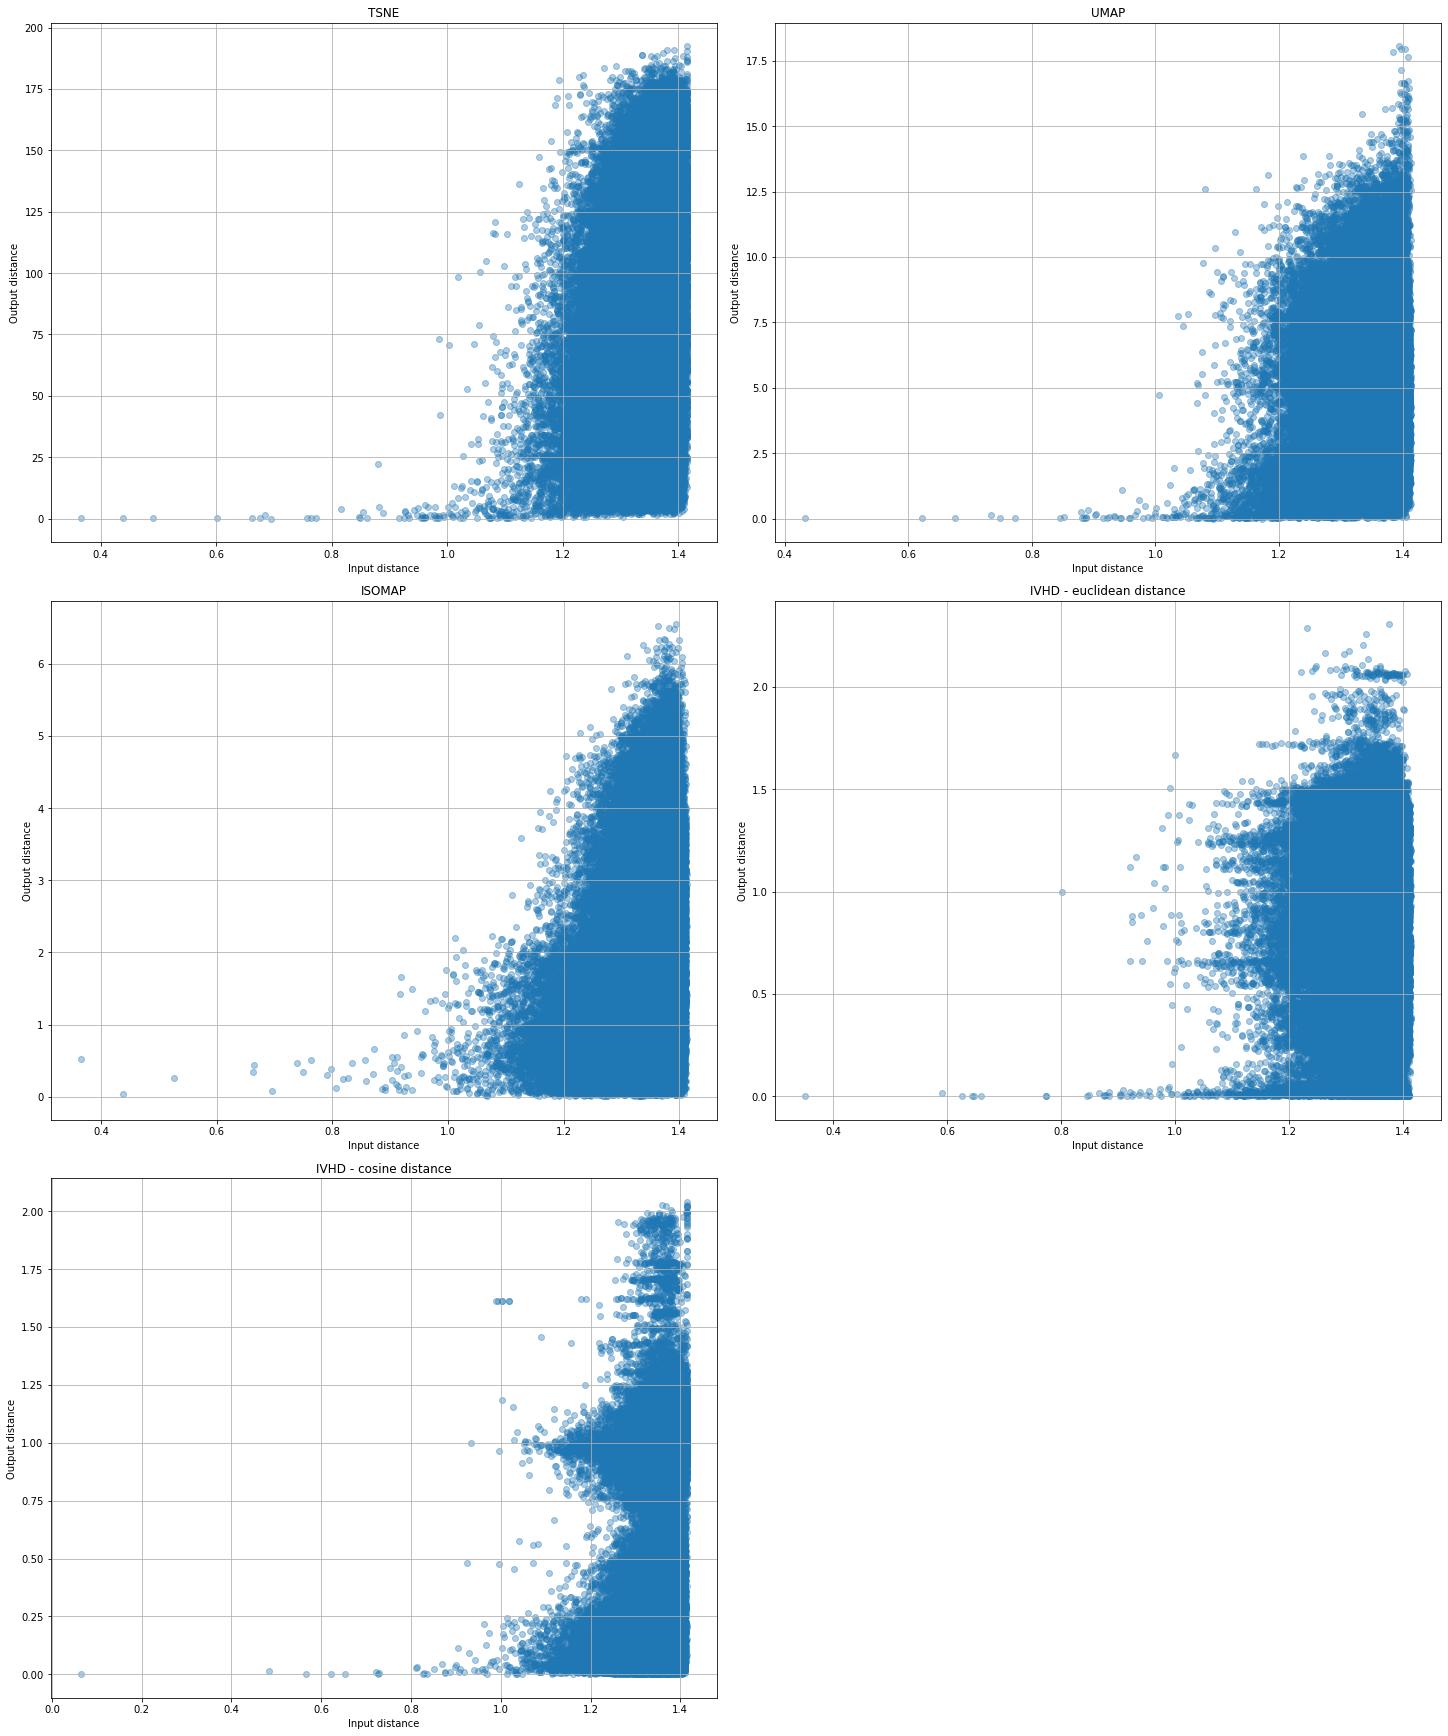

In [12]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
draw_diagram(tsne_diagram.original_distances, tsne_diagram.embedding_distances, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
draw_diagram(umap_diagram.original_distances, umap_diagram.embedding_distances, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
draw_diagram(isomap_diagram.original_distances, isomap_diagram.embedding_distances, 'ISOMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
draw_diagram(ivhd_euclidean_diagram.original_distances, ivhd_euclidean_diagram.embedding_distances, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
draw_diagram(ivhd_cosine_diagram.original_distances, ivhd_cosine_diagram.embedding_distances, 'IVHD - cosine distance', ax20)

plt.show()

In [13]:
fig.savefig("metrics_plots/20NG-shepard-diagrams.png", transparent=True, facecolor='w')

## Thrustworthiness

In [76]:
from metrics.trustworthiness_based_metric import TrustworthinessBasedMetric

In [78]:
random_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], df_random_embedding.iloc[0:5000, :]
)

tsne_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], tng_tsne_embedding.iloc[0:5000, :]
)

umap_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], tng_umap_embedding.iloc[0:5000, :]
)

isomap_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], tng_isomap_embedding.iloc[0:5000, :]
)

ivhd_euclidean_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], tng_ivhd_euclidean_embedding.iloc[0:5000, :]
)

ivhd_cosine_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], tng_ivhd_cosine_embedding.iloc[0:5000, :]
)

In [79]:
from pprint import pprint

In [80]:
pprint(random_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 68.49 seconds.
{'cosine': {'10': 0.5,
            '100': 0.506,
            '15': 0.502,
            '150': 0.508,
            '30': 0.502,
            '300': 1.144,
            '5': 0.498,
            '50': 0.503,
            '500': 0.928},
 'euclidean': {'10': 0.5,
               '100': 0.506,
               '15': 0.502,
               '150': 0.508,
               '30': 0.502,
               '300': 1.144,
               '5': 0.498,
               '50': 0.503,
               '500': 0.928}}


In [81]:
pprint(tsne_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 71.35 seconds.
{'cosine': {'10': 0.824,
            '100': 0.638,
            '15': 0.784,
            '150': 0.622,
            '30': 0.718,
            '300': 1.235,
            '5': 0.88,
            '50': 0.678,
            '500': 1.003},
 'euclidean': {'10': 0.824,
               '100': 0.638,
               '15': 0.784,
               '150': 0.622,
               '30': 0.718,
               '300': 1.235,
               '5': 0.88,
               '50': 0.678,
               '500': 1.003}}


In [82]:
pprint(umap_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 70.31 seconds.
{'cosine': {'10': 0.802,
            '100': 0.65,
            '15': 0.775,
            '150': 0.634,
            '30': 0.723,
            '300': 1.24,
            '5': 0.838,
            '50': 0.686,
            '500': 1.005},
 'euclidean': {'10': 0.802,
               '100': 0.65,
               '15': 0.775,
               '150': 0.634,
               '30': 0.723,
               '300': 1.24,
               '5': 0.838,
               '50': 0.686,
               '500': 1.005}}


In [83]:
pprint(isomap_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 71.41 seconds.
{'cosine': {'10': 0.571,
            '100': 0.573,
            '15': 0.57,
            '150': 0.575,
            '30': 0.572,
            '300': 1.208,
            '5': 0.574,
            '50': 0.571,
            '500': 0.99},
 'euclidean': {'10': 0.571,
               '100': 0.573,
               '15': 0.57,
               '150': 0.575,
               '30': 0.572,
               '300': 1.208,
               '5': 0.574,
               '50': 0.571,
               '500': 0.99}}


In [84]:
pprint(ivhd_euclidean_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 67.74 seconds.
{'cosine': {'10': 0.679,
            '100': 0.643,
            '15': 0.67,
            '150': 0.636,
            '30': 0.654,
            '300': 1.234,
            '5': 0.704,
            '50': 0.648,
            '500': 0.985},
 'euclidean': {'10': 0.679,
               '100': 0.643,
               '15': 0.67,
               '150': 0.636,
               '30': 0.654,
               '300': 1.234,
               '5': 0.704,
               '50': 0.648,
               '500': 0.985}}


In [85]:
pprint(ivhd_cosine_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 69.09 seconds.
{'cosine': {'10': 0.566,
            '100': 0.537,
            '15': 0.559,
            '150': 0.536,
            '30': 0.546,
            '300': 1.168,
            '5': 0.583,
            '50': 0.541,
            '500': 0.951},
 'euclidean': {'10': 0.566,
               '100': 0.537,
               '15': 0.559,
               '150': 0.536,
               '30': 0.546,
               '300': 1.168,
               '5': 0.583,
               '50': 0.541,
               '500': 0.951}}


## Distance Matrix based

In [86]:
from metrics.distance_matrix_based_metric import DistanceMatrixBasedMetric

In [105]:
tsne_embedding_dm_metric = DistanceMatrixBasedMetric(
    tng_tsne_embedding, df_labels_full
)

umap_embedding_dm_metric = DistanceMatrixBasedMetric(
    tng_umap_embedding, df_labels_full
)

isomap_embedding_dm_metric = DistanceMatrixBasedMetric(
    tng_isomap_embedding, df_labels_full
)

ivhd_euclidean_embedding_dm_metric = DistanceMatrixBasedMetric(
    tng_ivhd_euclidean_embedding, df_labels_full
)

ivhd_cosine_embedding_dm_metric = DistanceMatrixBasedMetric(
    tng_ivhd_cosine_embedding, df_labels_full
)

In [88]:
tsne_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 3.60 seconds.


0.5741307556513889

In [89]:
umap_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 3.51 seconds.


0.6393096210435043

In [90]:
isomap_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 3.54 seconds.


0.6370641797994728

In [91]:
ivhd_euclidean_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 3.72 seconds.


0.1743547731731599

In [106]:
ivhd_cosine_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 3.48 seconds.


0.9550326710325571

## Distance Matrix and KMeans based

In [97]:
from metrics.distance_matrix_and_kmeans_based_metric import DistanceMatrixAndKMeansBasedMetric

In [98]:
tsne_embedding_dmkmenas_metric = DistanceMatrixAndKMeansBasedMetric(
    tng_tsne_embedding, df_labels_full
)

umap_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    tng_umap_embedding, df_labels_full
)

isomap_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    tng_isomap_embedding, df_labels_full
)

ivhd_euclidean_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    tng_ivhd_euclidean_embedding, df_labels_full
)

ivhd_cosine_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    tng_ivhd_cosine_embedding, df_labels_full
)

In [99]:
tsne_embedding_dmkmenas_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 2.17 seconds.


0.5471914417249326

In [100]:
umap_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 2.17 seconds.


0.5556995169018796

In [101]:
isomap_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 2.77 seconds.


0.5817221948753

In [102]:
ivhd_euclidean_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 1.01 seconds.


0.18222164013512282

In [103]:
ivhd_cosine_embedding_dmkmeans_metric.calculate()

DistanceMatrixAndKMeansBasedMetric calculation took 1.94 seconds.


0.29148539165018555

## KNN gain and DR quality

In [14]:
from metrics.knn_gain_and_dr_quality import LocalMetric

local_metrics_tng = LocalMetric()

In [15]:
local_metrics_tng.calculate_knn_gain_and_dr_quality(
    X_lds=tng_tsne_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='tsne')

Calculating d_hd
tsne


In [16]:
local_metrics_tng.calculate_knn_gain_and_dr_quality(
    X_lds=tng_umap_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='umap')

Calculating d_hd
umap


In [17]:
local_metrics_tng.calculate_knn_gain_and_dr_quality(
    X_lds=tng_isomap_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='isomap')

Calculating d_hd
isomap


In [18]:
local_metrics_tng.calculate_knn_gain_and_dr_quality(
    X_lds=tng_ivhd_euclidean_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='ivhd euclidean')

Calculating d_hd
ivhd euclidean


In [19]:
local_metrics_tng.calculate_knn_gain_and_dr_quality(
    X_lds=tng_ivhd_cosine_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='ivhd cosine')

Calculating d_hd
ivhd cosine


Finished.


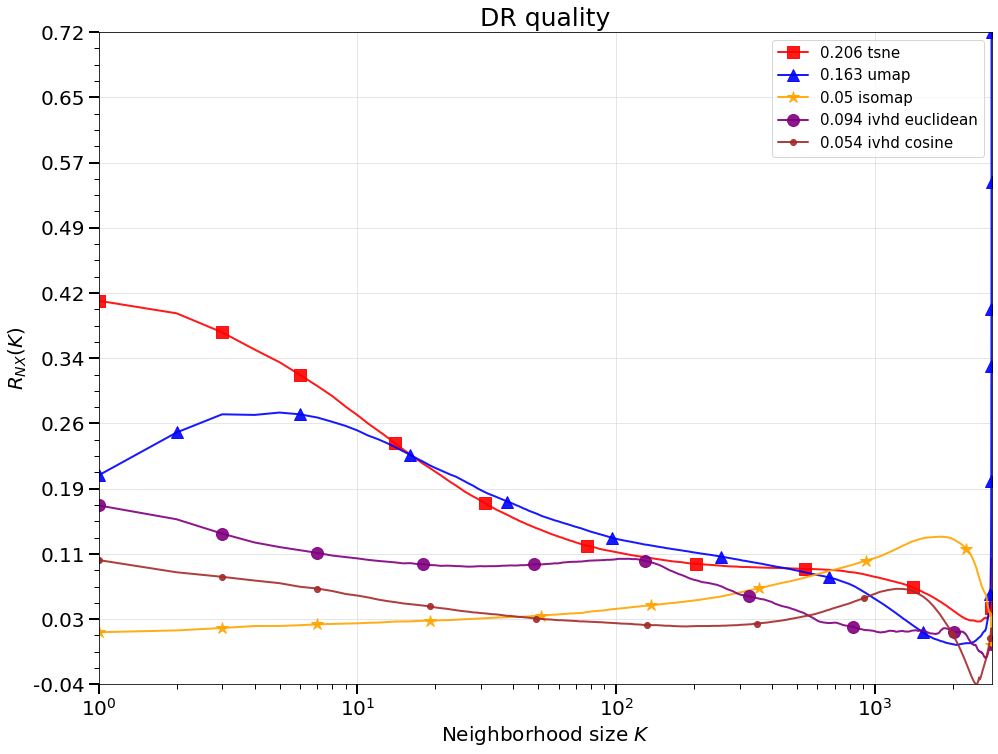

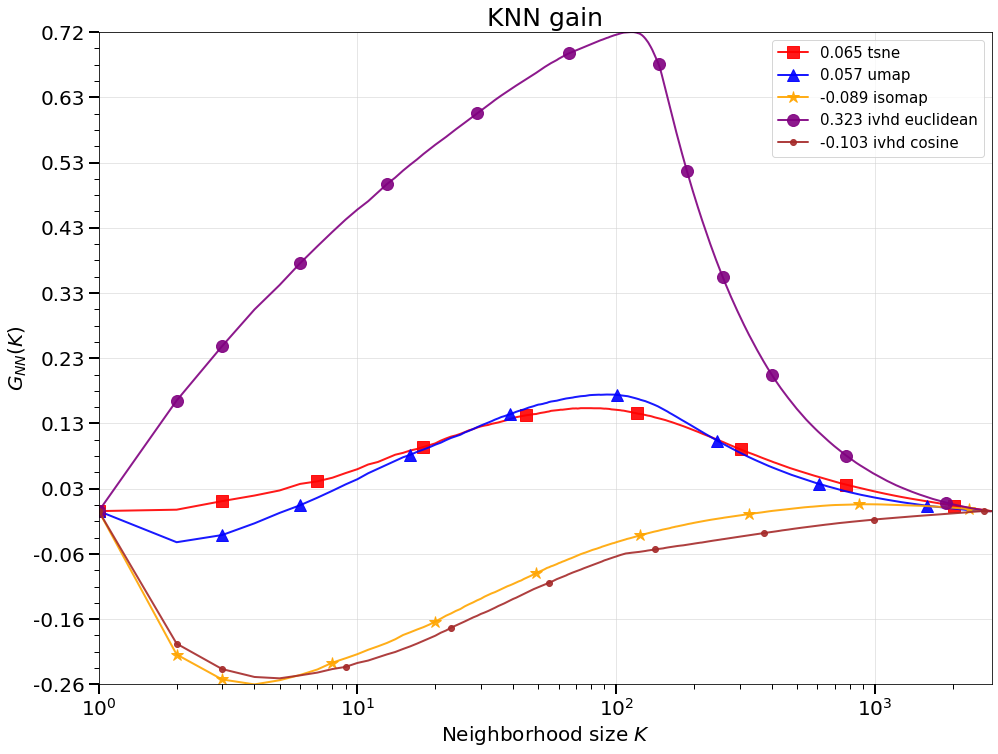

In [20]:
local_metrics_tng.visualize()

## Spearman correlation based

In [123]:
import metrics.spearman_correlation_based_metric
reload(metrics.spearman_correlation_based_metric)
from metrics.spearman_correlation_based_metric import SpearmanCorrelationBasedMetric

In [124]:
tsne_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    tng_tsne_embedding.iloc[0:5000, :]
)

In [125]:
tsne_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 199.44 seconds.


0.2596316524397953

In [126]:
umap_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    tng_umap_embedding.iloc[0:5000, :]
)

isomap_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    tng_isomap_embedding.iloc[0:5000, :]
)

ivhd_euclidean_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    tng_ivhd_euclidean_embedding.iloc[0:5000, :]
)

ivhd_cosine_embedding_sprmn_metric = SpearmanCorrelationBasedMetric(
    df_data_full.iloc[0:5000, :], df_labels_full.iloc[0:5000],
    tng_ivhd_cosine_embedding.iloc[0:5000, :]
)

In [127]:
umap_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 216.33 seconds.


0.28605365192953836

In [128]:
isomap_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 217.36 seconds.


0.18052768814346057

In [129]:
ivhd_euclidean_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 228.78 seconds.


0.13245541946565217

In [130]:
ivhd_cosine_embedding_sprmn_metric.calculate()

SpearmanCorrelationBasedMetric calculation took 217.26 seconds.


0.11619841935441992